In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan


In [2]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data set
ngo= pd.read_csv("C:/Country-data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
ngo.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [5]:
#Checking the shape
ngo.shape

(167, 10)

In [6]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
#Checking for null values
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#We observed that there are no null values

In [9]:
#Cleaning the data. There are some columns which are in percentage form , we will convert them
ngo['exports']=(ngo['exports']*ngo['gdpp'])/100
ngo['health']=(ngo['health']*ngo['gdpp'])/100
ngo['imports']=(ngo['imports']*ngo['gdpp'])/100

In [10]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


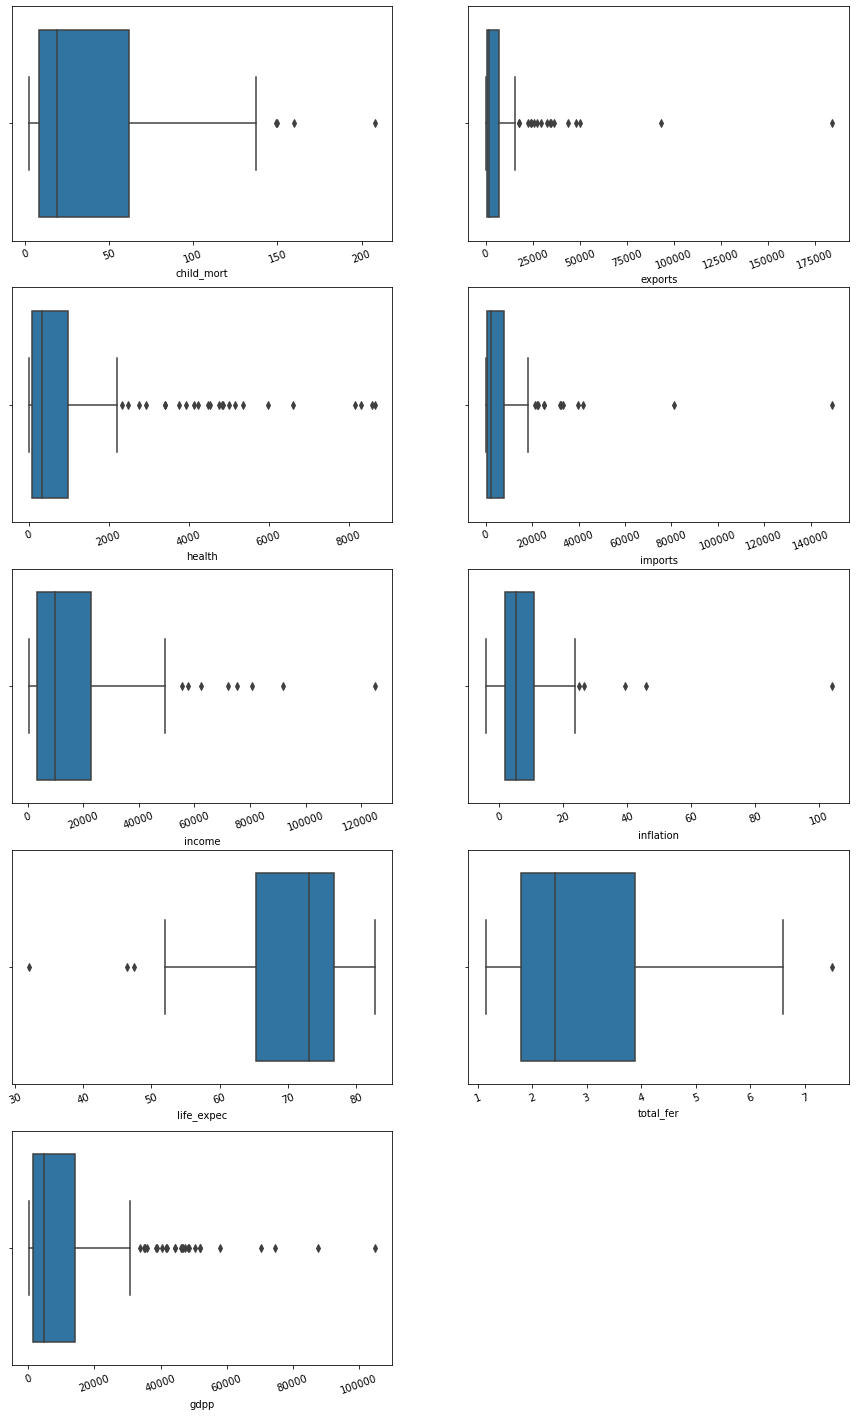

In [11]:
#EDA
plt.figure(figsize=(15,25))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):
    ax=plt.subplot(5,2,i[0]+1)
    sns.boxplot(ngo[i[1]])
    plt.xticks(rotation=20)
    

In [12]:
#There are outliers in every column so we have to treat them

In [13]:
#Outlier treatment
def outlier_treatment(ngo, col):
    
    Q1 = ngo[col].quantile(0.25)

    Q3 = ngo[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_cap  = Q1-1.5*IQR

    higher_cap = Q3+1.5*IQR

    ngo.loc[(ngo[col] > higher_cap), col] = higher_cap
    ngo.loc[(ngo[col] < lower_cap), col] = lower_cap
    
    return ngo

In [14]:
ngo= outlier_treatment(ngo,'child_mort')
ngo= outlier_treatment(ngo,'exports')
ngo= outlier_treatment(ngo,'health')
ngo= outlier_treatment(ngo,'imports')
ngo= outlier_treatment(ngo,'income')
ngo= outlier_treatment(ngo,'inflation')
ngo= outlier_treatment(ngo,'life_expec')
ngo= outlier_treatment(ngo,'total_fer')
ngo= outlier_treatment(ngo,'gdpp')

In [15]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.698204,4710.954895,680.241240,4756.898995,15921.574850,7.065066,70.663772,2.945075,10351.281437
std,38.443293,5832.960967,804.768458,5690.687520,15207.197459,6.704968,8.522535,1.505564,11612.044330
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,48.050000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,142.875000,17524.290000,2324.546750,18338.677500,51967.500000,24.160000,82.800000,7.007500,33130.000000


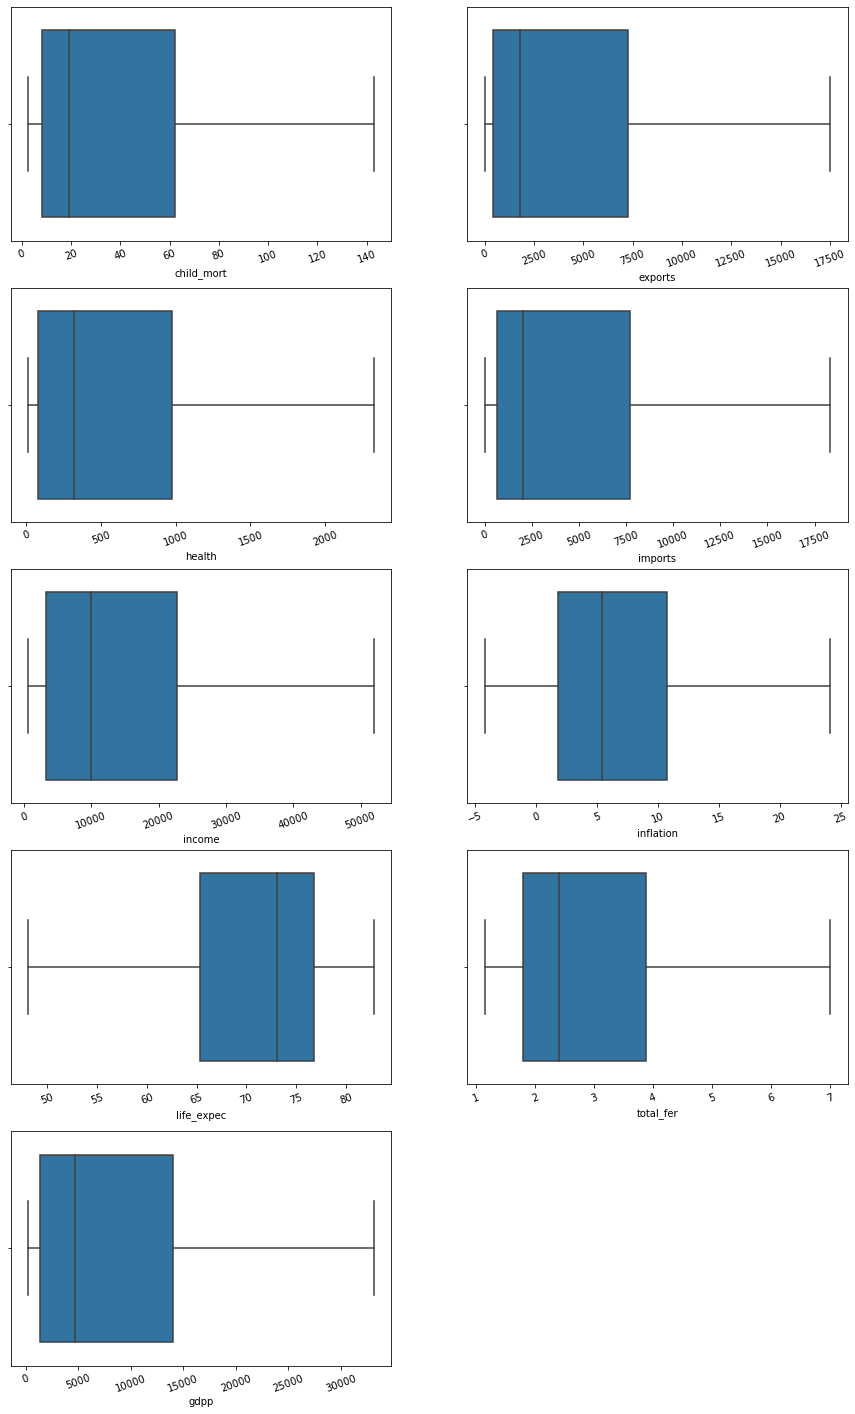

In [16]:
plt.figure(figsize=(15,25))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):
    ax=plt.subplot(5,2,i[0]+1)
    sns.boxplot(ngo[i[1]])
    plt.xticks(rotation=20)

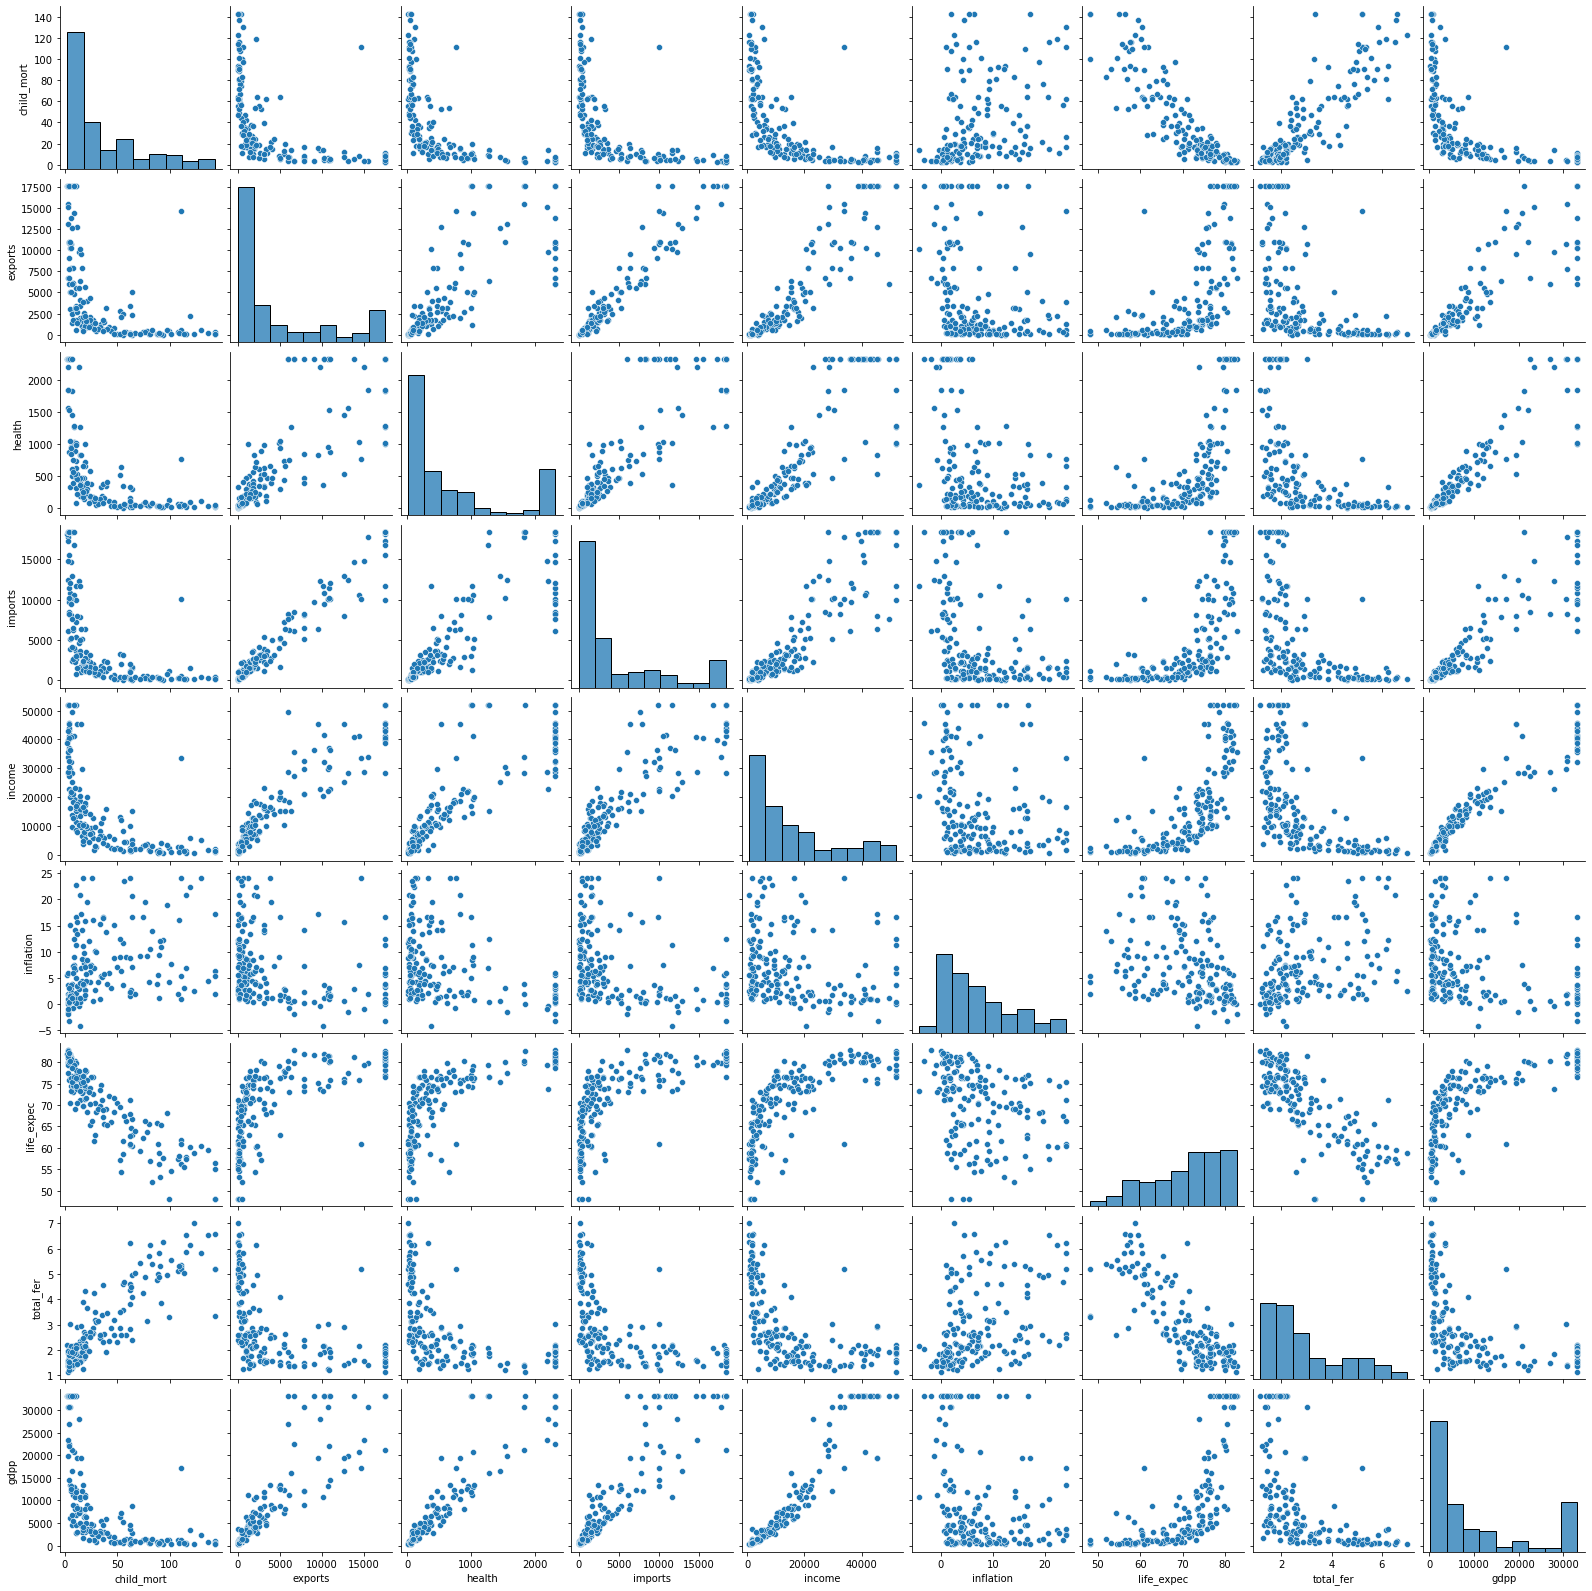

In [17]:
#Outliers have been treated by lower and upper capping them
sns.pairplot(ngo)
plt.show()

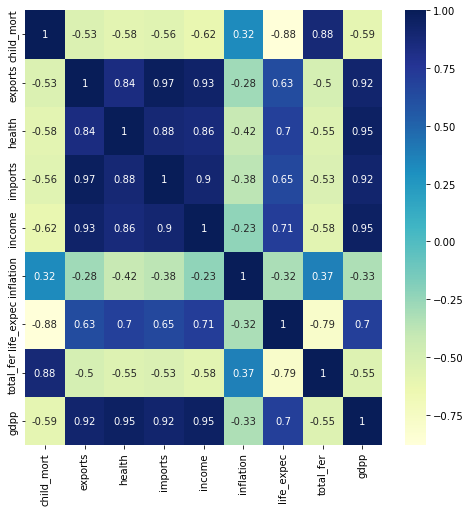

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(ngo.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [19]:
#Clustering
#HOPKINS TEST

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H



In [20]:
hopkins(ngo.drop('country', axis=1))

0.8819488208417133

In [21]:
#Given data is good enough for clustering

In [22]:
#Scaling the data
ngo1= ngo.drop('country', axis=1)


In [23]:
standard_scaler = StandardScaler()
ngo1= standard_scaler.fit_transform(ngo1)

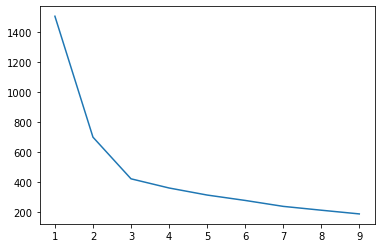

In [24]:
## Kmeans Clustering
# Finding optimal no. of clusters
# Elbow curve
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(ngo1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);   

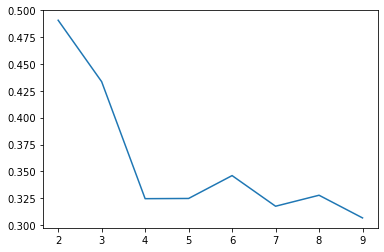

In [25]:
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(ngo1)
    ss.append([k, silhouette_score(ngo1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);


In [26]:
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    #initialize k means
    kmeans=KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(ngo1)
    
    cluster_labels = kmeans.labels_
    
    #Silhoeutte score
    silhouette_avg = silhouette_score(ngo1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.49089694803242895
For n_clusters=3, the silhouette score is 0.43360177139259864
For n_clusters=4, the silhouette score is 0.3253487802045869
For n_clusters=5, the silhouette score is 0.3278191932200708
For n_clusters=6, the silhouette score is 0.32831765389869416
For n_clusters=7, the silhouette score is 0.3096279283216197
For n_clusters=8, the silhouette score is 0.32760093269925983


In [27]:
# Optimal number of K=3

In [28]:
#Initializing Kmeans
kmeans=KMeans(n_clusters=3, max_iter=100, random_state=100)
kmeans.fit(ngo1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [29]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [30]:
##Keeping our original data safe
ngo_org=ngo.copy()

In [31]:
ngo_km=pd.concat([ngo, pd.Series(kmeans.labels_)], axis=1)
ngo_km.columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
ngo_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [32]:
ngo_km['cluster_id'].value_counts()

2    78
0    48
1    41
Name: cluster_id, dtype: int64

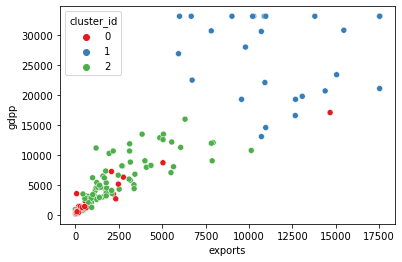

In [33]:
#Kmeans cluster visualization
sns.scatterplot(x='exports',y='gdpp',hue='cluster_id',legend='full',data=ngo_km, palette='Set1')
plt.show()

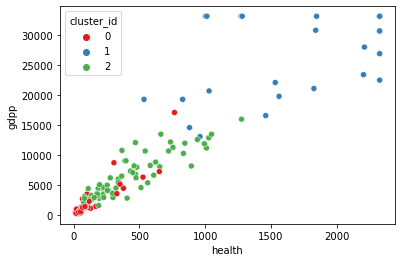

In [34]:
sns.scatterplot(x='health',y='gdpp',hue='cluster_id',legend='full',data=ngo_km, palette='Set1')
plt.show()

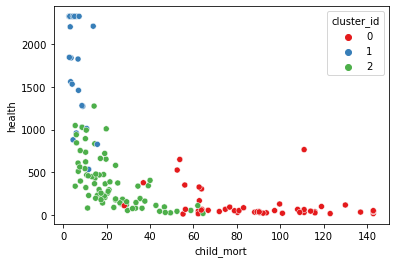

In [35]:
sns.scatterplot(x='child_mort',y='health',hue='cluster_id',legend='full',data=ngo_km, palette='Set1')
plt.show()

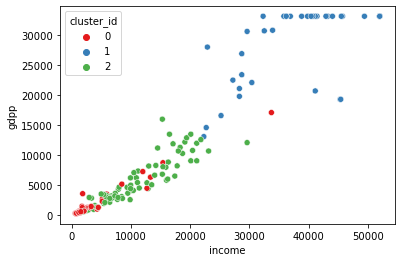

In [36]:
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=ngo_km, palette='Set1')
plt.show()

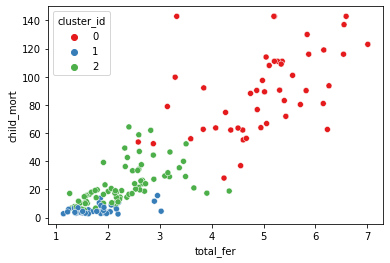

In [37]:
sns.scatterplot(x='total_fer',y='child_mort',hue='cluster_id',legend='full',data=ngo_km, palette='Set1')
plt.show()

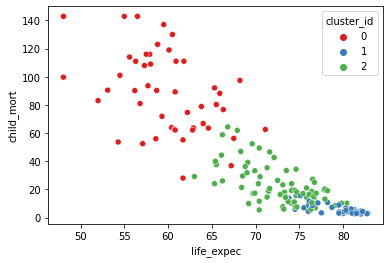

In [38]:
sns.scatterplot(x='life_expec',y='child_mort',hue='cluster_id',legend='full',data=ngo_km, palette='Set1')
plt.show()

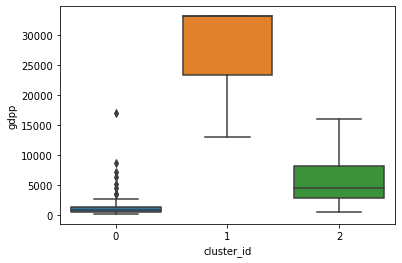

In [39]:
#Kmeans cluster profiling
sns.boxplot(data=ngo_km, x='cluster_id',y='gdpp')
plt.show()

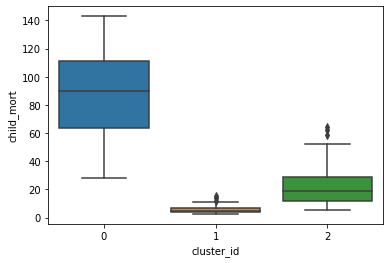

In [40]:
sns.boxplot(data=ngo_km, x='cluster_id',y='child_mort')
plt.show()

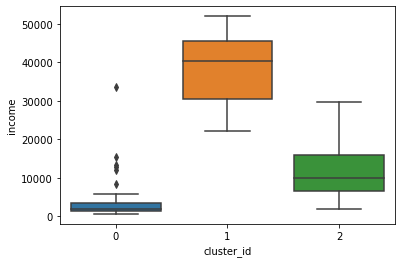

In [41]:
sns.boxplot(data=ngo_km, x='cluster_id',y='income')
plt.show()

In [42]:
# Cluster 0 has very low income and gdpp. It also has a very high child mortality rate. This cluster should be our Focus.

In [43]:
# Finding the observations that belong to cluster id  0
ngo_km[ngo_km['cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [44]:
#Sorting by child mortality , gdpp and income
top_kmeans=ngo_km[ngo_km['cluster_id']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans=top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575,0


In [45]:
top_10=top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


In [46]:
# The top 10 countries obtained from  k-means models can be seen above 

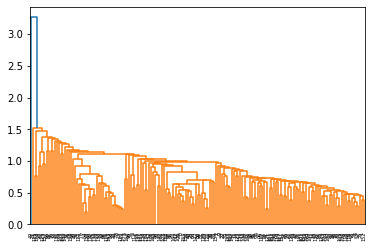

In [47]:
# Heirarchial Clustering
mergings_single=linkage(ngo1, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

In [48]:
# The clusters formed above are not formed correctly, so we will not use it.

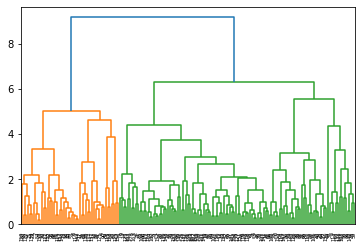

In [49]:
mergings_complete= linkage(ngo1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [50]:
# We will use complete linkage model. Looking at the dendrogram, there seems to be 3 clusters
cluster_labels=cut_tree(mergings_complete, n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 2, 1, 0,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [51]:
ngo_hm=pd.concat([ngo, pd.Series(cluster_labels)], axis=1)
ngo_hm.columns=['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
ngo_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [52]:
ngo_hm['cluster_labels'].value_counts()

1    75
2    49
0    43
Name: cluster_labels, dtype: int64

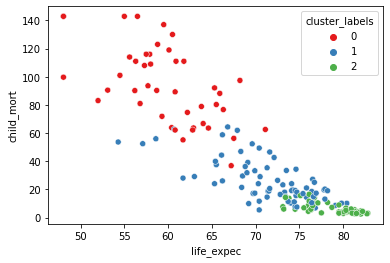

In [53]:
#Heirarchial cluster visualization
sns.scatterplot(x='life_expec',y='child_mort', hue='cluster_labels', legend='full', data=ngo_hm, palette='Set1')
plt.show()

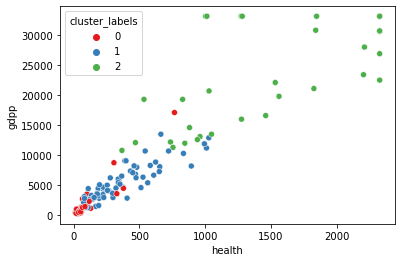

In [54]:
sns.scatterplot(x='health',y='gdpp', hue='cluster_labels', legend='full', data=ngo_hm, palette='Set1')
plt.show()

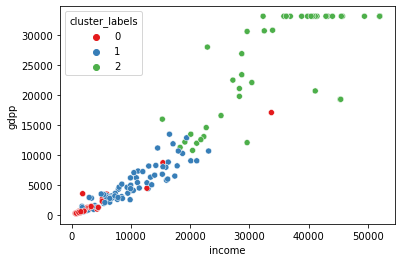

In [55]:
sns.scatterplot(x='income',y='gdpp', hue='cluster_labels', legend='full', data=ngo_hm, palette='Set1')
plt.show()

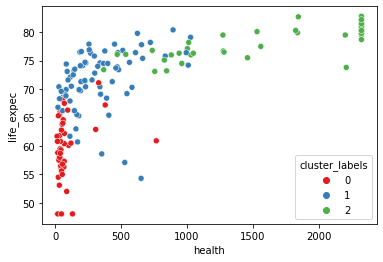

In [57]:
sns.scatterplot(x='health',y='life_expec', hue='cluster_labels', legend='full', data=ngo_hm, palette='Set1')
plt.show()

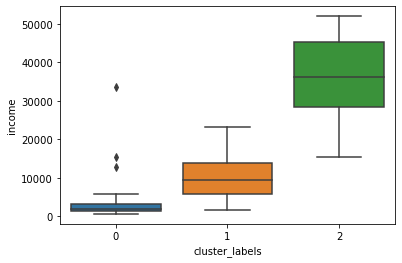

In [58]:
# Cluster Profiling
sns.boxplot(data=ngo_hm, x='cluster_labels', y='income')
plt.show()

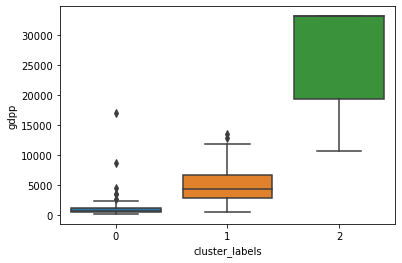

In [59]:
sns.boxplot(data=ngo_hm, x='cluster_labels',y='gdpp')
plt.show()

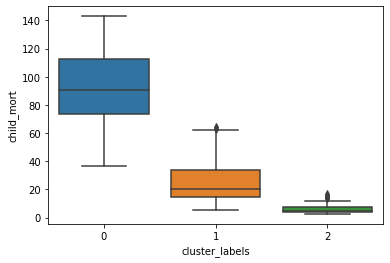

In [60]:
sns.boxplot(data=ngo_hm, x='cluster_labels', y='child_mort')
plt.show()

In [61]:
# As you can see above , cluster 0 has high child mortality , low gdpp and low income.

In [62]:
# Now we wil find the observations that belong to cluster 0


ngo_hm[ngo_hm['cluster_labels']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

In [63]:
# Listing out the top 10 countries with low gdpp, low income and high child mortality rate


top_h=ngo_hm[ngo_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False,True,True])
top_h=top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Sierra Leone,142.875,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399,0
1,Central African Republic,142.875,52.628,17.7508,118.190,888.0,2.01,48.05,5.2100,446,0
2,Haiti,142.875,101.286,45.7442,428.314,1500.0,5.45,48.05,3.3300,662,0
3,Chad,142.875,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5900,897,0
4,Mali,137.000,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708,0
5,Nigeria,130.000,589.490,118.1310,405.420,5150.0,24.16,60.50,5.8400,2330,0
6,Niger,123.000,77.256,17.9568,170.868,814.0,2.55,58.80,7.0075,348,0
7,Angola,119.000,2199.190,100.6050,1514.370,5900.0,22.40,60.10,6.1600,3530,0
8,"Congo, Dem. Rep.",116.000,137.274,26.4194,165.664,609.0,20.80,57.50,6.5400,334,0
9,Burkina Faso,116.000,110.400,38.7550,170.200,1430.0,6.81,57.90,5.8700,575,0


In [64]:
#  the top 10 countries with low gdpp , low income and high child mortatlity rate
top_10h =top_h.iloc[:10]
top_10h['country'].reset_index().drop('index', axis=1)


,country
0,Sierra Leone
1,Central African Republic
2,Haiti
3,Chad
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


In [ ]:
# The top 10 countries obtained from the heirarchial model which need to be focused on are listed above.